In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(
    "glass.data",
    names=["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"],
)
data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Extract the samples of type class 1 (building_windows_float_processed) and 7 (headlamps). How many samples belong to the two groups?

In [82]:
print(data["Type"])

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


In [83]:
type_class_1 = data[data["Type"] == 1]
type_class_7 = data[data["Type"] == 7]
print(type_class_1.info())
print(type_class_7.info())

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 0 to 69
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      70 non-null     int64  
 1   RI      70 non-null     float64
 2   Na      70 non-null     float64
 3   Mg      70 non-null     float64
 4   Al      70 non-null     float64
 5   Si      70 non-null     float64
 6   K       70 non-null     float64
 7   Ca      70 non-null     float64
 8   Ba      70 non-null     float64
 9   Fe      70 non-null     float64
 10  Type    70 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 6.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 185 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      29 non-null     int64  
 1   RI      29 non-null     float64
 2   Na      29 non-null     float64
 3   Mg      29 non-null     float64
 4   Al      29 non-null     float64
 5   S

There are 70 samples of type "building_windows_float_processed" and 29 of type "building_windows_float_processed".

Normalize the data.

In [84]:
data_mean = data.mean()
data_std = data.std()

normalized_data = (data - data_mean) / data_std

normalized_data.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,-1.719943,0.870826,0.284287,1.251704,-0.690822,-1.124446,-0.670134,-0.145425,-0.352051,-0.585079,-0.84629
1,-1.703794,-0.248750,0.590433,0.634680,-0.170061,0.102080,-0.026152,-0.791877,-0.352051,-0.585079,-0.84629
2,-1.687644,-0.719631,0.149582,0.600016,0.190465,0.437760,-0.164148,-0.827010,-0.352051,-0.585079,-0.84629
3,-1.671494,-0.232286,-0.242285,0.697076,-0.310266,-0.052850,0.111844,-0.517838,-0.352051,-0.585079,-0.84629
4,-1.655344,-0.311315,-0.168810,0.648546,-0.410413,0.553957,0.081178,-0.623237,-0.352051,-0.585079,-0.84629


Perform PCA on the dataset by means of the SVD and plot the trend of the singular values, the cumulative fraction and the explained variance.

(214, 10)


Text(0.5, 1.0, 'explained variance')

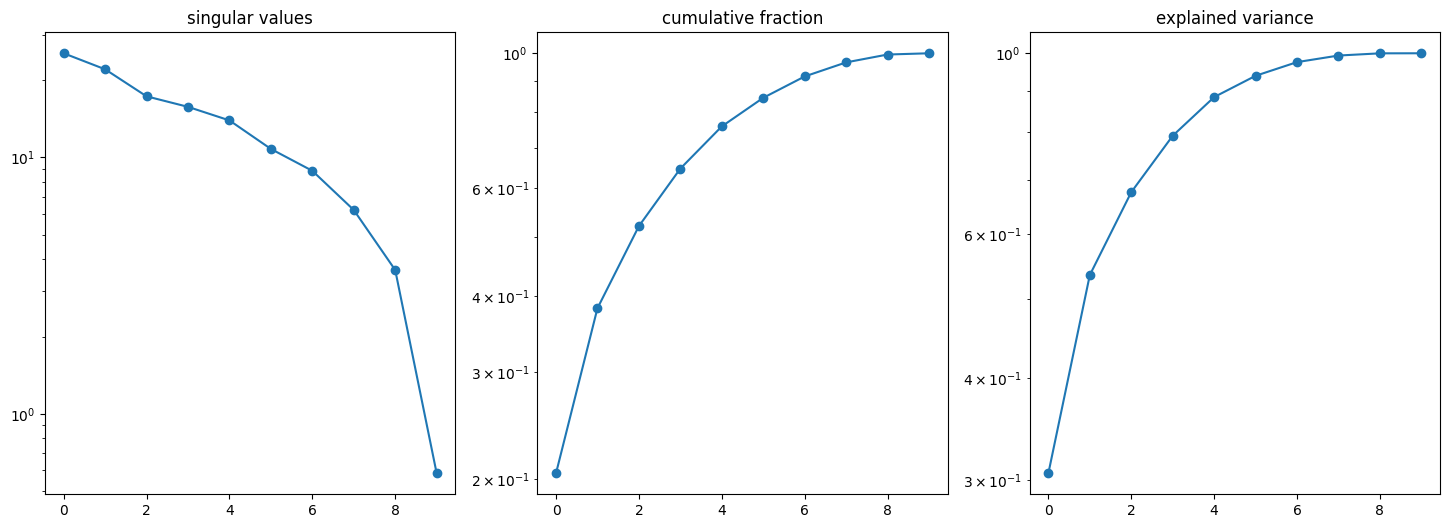

In [85]:
data_np = normalized_data.to_numpy()
attributes = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type"]
# Remove the ID column
data_np = data_np[:, 1:]
print(data_np.shape)

U, s, VT = np.linalg.svd(data_np)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axs[0].semilogy(s, "o-")
axs[0].set_title("singular values")
axs[1].semilogy(np.cumsum(s) / np.sum(s), "o-")
axs[1].set_title("cumulative fraction")
axs[2].semilogy(np.cumsum(s**2) / np.sum(s**2), "o-")
axs[2].set_title("explained variance")

The last singular value is very small with respect to the others, so we may want to remove it.

Text(0.5, 1.0, 'explained variance')

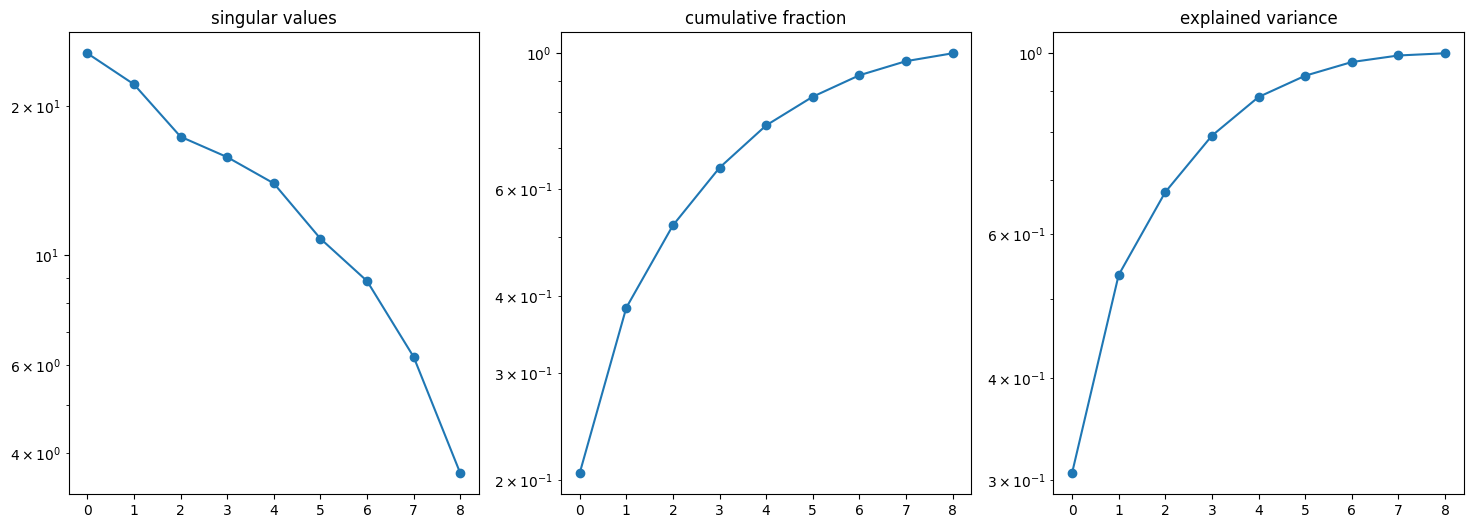

In [86]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axs[0].semilogy(s[:-1], "o-")
axs[0].set_title("singular values")
axs[1].semilogy(np.cumsum(s[:-1]) / np.sum(s[:-1]), "o-")
axs[1].set_title("cumulative fraction")
axs[2].semilogy(np.cumsum(s[:-1] ** 2) / np.sum(s[:-1] ** 2), "o-")
axs[2].set_title("explained variance")

Compute a matrix containing the principal components associated with the dataset.

In [87]:
PHI = data_np @ VT.T
print(PHI.shape)

(214, 10)


Generate a scatterplot of the first two principal components of the dataset, grouped by label.

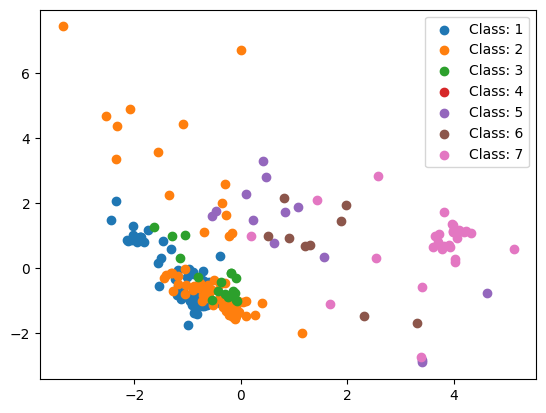

In [88]:
for i in range(7):
    plt.scatter(
        PHI[data["Type"] == i + 1, 0],
        PHI[data["Type"] == i + 1, 1],
        label="Class: " + str(i + 1),
    )
plt.legend()

Only plotting samples of the groups 1 and 7:

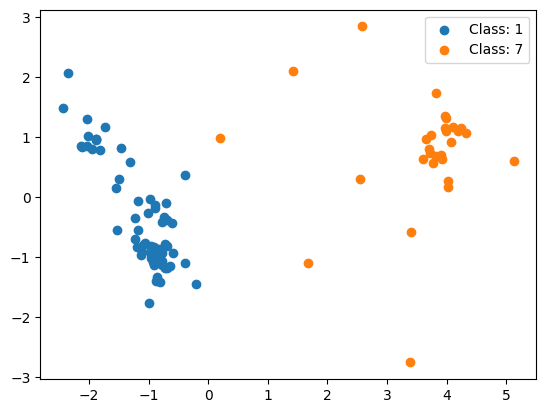

In [98]:
plt.scatter(
    PHI[data["Type"] == 1, 0],
    PHI[data["Type"] == 1, 1],
    label="Class: 1",
)
plt.scatter(
    PHI[data["Type"] == 7, 0],
    PHI[data["Type"] == 7, 1],
    label="Class: 7",
)
plt.legend()

Consider now the first principle component. By looking at the components of the first principal direction, do you expect building windows float processed glasses to have a large or small concentration of magnesium and aluminium, respectively? And what about headlamps glasses?

Columns of V are the left singular vectors, and are the principal directions.

In [90]:
V = VT.T
print(V.shape)

(10, 10)


In [97]:
pd.DataFrame({"attribute": attributes, "1st dir.": V[:, 0]})

,attribute,1st dir.
0,RI,-0.255322
1,Na,0.323838
2,Mg,-0.387968
3,Al,0.442663
4,Si,0.122202
5,K,0.068062
6,Ca,-0.170367
7,Ba,0.394859
8,Fe,-0.161043
9,Type,0.503021


As we can see from the scatter plot of the samples of class 1, they all have a first principal component that is below 0, while samples of class 7 have a first principal component that is above 0.

We can see that along the first direction the Magnesium has a negative weight, while Aluminum has a positive one: this may suggest that samples from class 1 ("building_windows_float_processed"), since they all have a negative first principal component, have a higher concentration of Magnesium, while on the other hand samples from class 2 ("headlamps"), which all have positive principal components, have a higher concentration of Aluminium.

In [99]:
print(data[data["Type"] == 1])

    Id       RI     Na    Mg    Al     Si     K     Ca   Ba    Fe  Type
0    1  1.52101  13.64  4.49  1.10  71.78  0.06   8.75  0.0  0.00     1
1    2  1.51761  13.89  3.60  1.36  72.73  0.48   7.83  0.0  0.00     1
2    3  1.51618  13.53  3.55  1.54  72.99  0.39   7.78  0.0  0.00     1
3    4  1.51766  13.21  3.69  1.29  72.61  0.57   8.22  0.0  0.00     1
4    5  1.51742  13.27  3.62  1.24  73.08  0.55   8.07  0.0  0.00     1
..  ..      ...    ...   ...   ...    ...   ...    ...  ...   ...   ...
65  66  1.52099  13.69  3.59  1.12  71.96  0.09   9.40  0.0  0.00     1
66  67  1.52152  13.05  3.65  0.87  72.22  0.19   9.85  0.0  0.17     1
67  68  1.52152  13.05  3.65  0.87  72.32  0.19   9.85  0.0  0.17     1
68  69  1.52152  13.12  3.58  0.90  72.20  0.23   9.82  0.0  0.16     1
69  70  1.52300  13.31  3.58  0.82  71.99  0.12  10.17  0.0  0.03     1

[70 rows x 11 columns]


In [100]:
print(data[data["Type"] == 7])

      Id       RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type
185  186  1.51131  13.69  3.20  1.81  72.81  1.76  5.43  1.19  0.00     7
186  187  1.51838  14.32  3.26  2.22  71.25  1.46  5.79  1.63  0.00     7
187  188  1.52315  13.44  3.34  1.23  72.38  0.60  8.83  0.00  0.00     7
188  189  1.52247  14.86  2.20  2.06  70.26  0.76  9.76  0.00  0.00     7
189  190  1.52365  15.79  1.83  1.31  70.43  0.31  8.61  1.68  0.00     7
190  191  1.51613  13.88  1.78  1.79  73.10  0.00  8.67  0.76  0.00     7
191  192  1.51602  14.85  0.00  2.38  73.28  0.00  8.76  0.64  0.09     7
192  193  1.51623  14.20  0.00  2.79  73.46  0.04  9.04  0.40  0.09     7
193  194  1.51719  14.75  0.00  2.00  73.02  0.00  8.53  1.59  0.08     7
194  195  1.51683  14.56  0.00  1.98  73.29  0.00  8.52  1.57  0.07     7
195  196  1.51545  14.14  0.00  2.68  73.39  0.08  9.07  0.61  0.05     7
196  197  1.51556  13.87  0.00  2.54  73.23  0.14  9.41  0.81  0.01     7
197  198  1.51727  14.70  0.00  2.34  

As we can see, this is supported by the original data.